In [81]:
from __future__ import division
from tkinter import *
import math
import numpy as np
import matplotlib.pyplot as plt

In [82]:
win=Tk()
win.title('Free Vibration on Cantilever Beam - Inputs')
win.geometry("430x500")

lbl1=Label(win, text='End Mass (kg)')
lbl2=Label(win, text='Material')
lbl3=Label(win, text='Damping ratio')
lbl4=Label(win, text='Length (mm)')
lbl5=Label(win, text='Cross Section')

t1=Entry()

t2=StringVar(win)
t2.set("Steel")
mat = OptionMenu(win, t2, "Steel", "Aluminium", "Copper")
mat.pack()
        
t3=Entry()
        
t4=Entry()
t5=StringVar(win)
t5.set("Square")
shape=OptionMenu(win, t5, "Square", "Circle", "T-Section","Random")
shape.pack()

if t5=="Random":
    lbl6="Enter the moment of inertia of the cross section"
    t6=Entry()
    lbl.place(x=50, y=300)
    t6.place(x=250, y=300)
    
lbl1.place(x=50, y=50)
t1.place(x=250, y=50)
lbl2.place(x=50, y=100)
mat.place(x=250, y=100)
b1=Button(win, text='Calculate', command=get_values)
b1.place(x=190, y=350)
lbl3.place(x=50, y=150)
t3.place(x=250, y=150)
lbl4.place(x=50, y=200)
t4.place(x=250, y=200)
lbl5.place(x=50, y=250)
shape.place(x=250, y=250)

win.mainloop()

In [59]:
def get_values():
    
    m = float(t1.get())
    material = t2.get()
    z = float(t3.get())
    l = float(t4.get())
    shape = t5.get()
    
    if material == "Steel":
        E = 200*10**3 # MPa
    elif material == "Aluminium":
        E = 68*10**3 # MPa
    else:
        E = 121*10**3 # MPa
        
    if shape == "Square":
        I = 4218.75*10**4 # mm^4
    elif shape == "Circle":
        I = 2485.05*10**4 # mm^4
    elif shape == "T-Section":
        I = 541.1*10**4   # Ixx mm^4
        
    k = 3*E*I/l**3
    decrement = 2*np.pi*z
    wn = np.sqrt(k/m)
    fn = wn/(2*np.pi)
    wd = wn*(1-z**2)
    cc = 2*np.sqrt(m*k)
    c = z*cc
    q = 1/(2*z)
        
    newWin = Tk()
    newWin.title('Free Vibration of Cantilever Beam - Results')
    newWin.geometry('500x500')

    lbl1 = Label(newWin, text="Spring stiffness k (N/m)")
    lbl2 = Label(newWin, text='Natural angular frequency (wn)[rad/s]')
    lbl3 = Label(newWin, text='Natural frequency (fn) [Hz]')
    lbl4 = Label(newWin, text='Critical damping (cc)')
    lbl5 = Label(newWin, text='Damping factor (c)')
    lbl6 = Label(newWin, text='Damped natural frequency (wd)')
    lbl7 = Label(newWin, text='Quality factor (Q)')
    lbl8 = Label(newWin, text='Logarithmic Decrement (Delta)')

    k, decrement, wn, fn, wd, cc, c, q = calculate()

    a1 = Label(newWin, text=str(k))
    a2 = Label(newWin, text=str(wn))
    a3 = Label(newWin, text=str(fn))
    a4 = Label(newWin, text=str(cc))
    a5 = Label(newWin, text=str(c))
    a6 = Label(newWin, text=str(wd))
    a7 = Label(newWin, text=str(q))
    a8 = Label(newWin, text=str(decrement))

    lbl1.place(x=50, y=50)
    lbl2.place(x=50, y=100)
    lbl3.place(x=50, y=150)
    lbl4.place(x=50, y=200)
    lbl5.place(x=50, y=250)
    lbl6.place(x=50, y=300)
    lbl7.place(x=50, y=350)
    lbl8.place(x=50, y=400)

    a1.place(x=350, y=50)
    a2.place(x=350, y=100)
    a3.place(x=350, y=150)
    a4.place(x=350, y=200)
    a5.place(x=350, y=250)
    a6.place(x=350, y=300)
    a7.place(x=350, y=350)
    a8.place(x=350, y=400) 
    
    newWin.mainloop()

In [73]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interactive(children=(FloatSlider(value=0.25, description='z', max=0.5, step=0.01), Output()), _dom_classes=('…

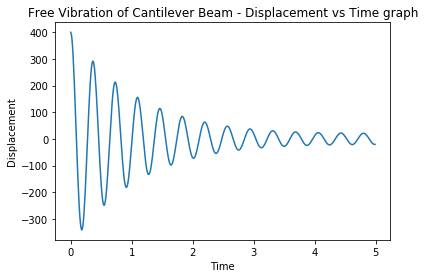

In [74]:
# def plot(z, wn):
#     wd = wn*(1-z**2)
#     t=np.arange(0,5,0.01)
#     init_d = 400
#     displacement= np.exp(-z*wn*t)*init_d*np.cos(wd*t) + (z*wn*init_d*np.sin(wd*t))/wd
#     plt.plot(t, displacement)
#     plt.title("Free Vibration of Cantilever Beam - Displacement vs Time graph")
#     plt.xlabel("Time")
#     plt.ylabel("Displacement")
    
# interactive(plot(0.05, 17.32), z=(0,0.5,0.01))